In [1]:
#Import the Data Set and do the data preprocessing
#PRoblem Statement -
# Develop a sentiment analysis model to classify reiviews as positive or negative.

#Preprocess the review text using techniques such as Lower casing, removing stop words and Lematizatio

#use the trained model accurately predict the sentiment of new, unseen reviews.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('Reviews.csv')

In [4]:
print(data)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [5]:
#Review the top 5 rows
data.head() # here giving arguments is optional, by default it will take 5 - which gives first 5 records

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
#Review the last 5 rows
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [7]:
data.tail(6)

,Review,Liked
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [9]:
# TO CHECK NULL VALUES
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [10]:
#TO CHECK DUPLICATED VALUES
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [11]:
# TO UNDERSTAND THE DATA IN GRAPHICAL/PICTORIAL MANNER, we need to use EDA - Exploratory Data Analysis


In [16]:
pip install seaborn

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     --------- --------------------------- 41.0/165.5 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------------- ------------------------ 112.6/294.9 kB 3.3 MB/s eta 0:00:01
   ----------------------- ---------------- 174.1/294.9 kB 2.1 MB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.9 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
    --------------------------------------- 0.1/8.0 MB 3.3 MB/s eta 0:00:03
   - -------------------------------------- 0.2/8.0 MB 2.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/8.0 MB 3.4 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/8.0 MB 3.8 MB/s eta 0:00:02
   

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
from wordcloud import WordCloud

In [20]:
pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.4 kB 653.6 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/301.4 kB 1.2 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/301.4 kB 1.4 MB/s eta 0:00:01
   ------------------------------------ --- 276.5/301.4 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
combined_text = " ".join(data['Review']) # combine all review text into one string

In [15]:
wordcloud = WordCloud(width=800, height = 400, background_color = 'white').generate(combined_text)

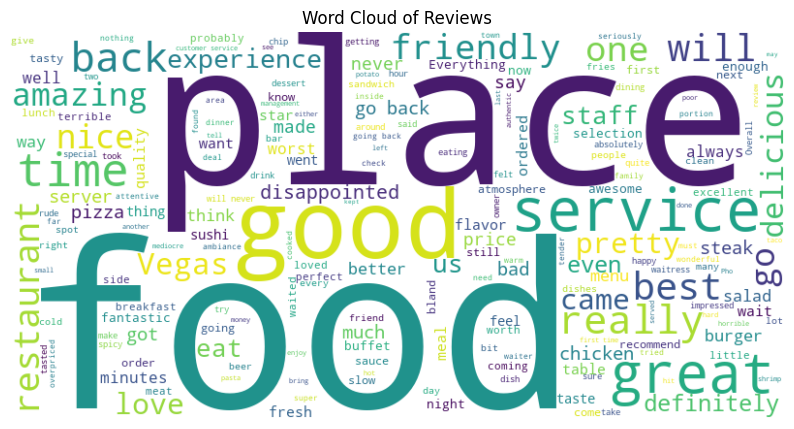

In [16]:
#plot the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()
#The bigger the font of the word, that many times that word is repeated in the dataset.

In [17]:
from collections import Counter

In [18]:
targeted_words = ['good', 'great', 'amazing', 'love', 'worth', 'food', 'good', 'place']
all_words = " ".join(data['Review']).lower().split() # flattern reviews into a singlie list of words
word_counts = Counter(all_words) # count of target words
target_word_count = {word: word_counts[word] for word in targeted_words}

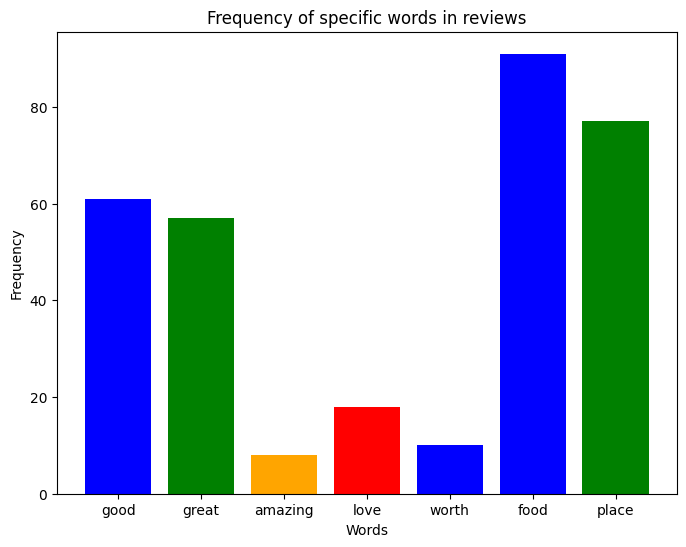

In [19]:
#plotting
plt.figure(figsize=(8,6))
plt.bar(target_word_count.keys(), target_word_count.values(), color = ['blue', 'green', 'orange', 'red', 'blue'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of specific words in reviews')
plt.show()

In [20]:
# Text preprocessing

In [21]:
# Converting a dataset into lower case
lowercased_text = data['Review'].str.lower()
print(lowercased_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [23]:
pip install nltk


     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.6 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 763.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB 1.9 MB/s eta 0:00:01
   - -------------------------------------- 0.1/1.5 MB 1.1 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.5 MB 655.4 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.5 MB 726.2 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.5 MB 566.5 kB/s eta 0:00:03
   ---- -----------

In [35]:
# Tokenization
from nltk.tokenize import word_tokenize
#import nltk
#nltk.download('punkt')

#import nltk
#nltk.download('stopwords')

In [36]:
data['Tokens'] = data['Review'].apply(word_tokenize)
print(data['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [41]:
#Removing Stop Words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [44]:
stop_words = set(stopwords.words('english'))

In [45]:
data['Tokens'] = data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

In [46]:
print(data['Tokens'])

0                            [Wow, ..., Loved, place, .]
1                                       [Crust, good, .]
2                        [Not, tasty, texture, nasty, .]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4               [The, selection, menu, great, prices, .]
                             ...                        
995        [I, think, food, flavor, texture, lacking, .]
996                       [Appetite, instantly, gone, .]
997          [Overall, I, impressed, would, go, back, .]
998    [The, whole, experience, underwhelming, ,, I, ...
999    [Then, ,, I, n't, wasted, enough, life, ,, pou...
Name: Tokens, Length: 1000, dtype: object


In [47]:
#stemming 
from nltk.stem import PorterStemmer

In [48]:
stemmer = PorterStemmer()

In [49]:
data['stemmed'] = data['Review'].apply(lambda x: " ".join([stemmer.stem(word) for word in word_tokenize(x)]))

In [50]:
print(data['stemmed'])

0                               wow ... love thi place .
1                                    crust is not good .
2               not tasti and the textur wa just nasti .
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                             appetit instantli gone .
997      overal i wa not impress and would not go back .
998    the whole experi wa underwhelm , and i think w...
999    then , as if i had n't wast enough of my life ...
Name: stemmed, Length: 1000, dtype: object


In [51]:
data['stemmed'].value_counts()

stemmed
# name ?                                                                                                                               4
the food wa terribl .                                                                                                                  2
i would not recommend thi place .                                                                                                      2
i love thi place .                                                                                                                     2
i wo n't be back .                                                                                                                     2
                                                                                                                                      ..
omg , the food wa delicioso !                                                                                                          1
there is noth authent about thi p

In [52]:
# Lemmatization - Removal of suffix from base words, ex: running --> run
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SATWIK\AppData\Roaming\nltk_data...


True

In [60]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [54]:
lemmatizer = WordNetLemmatizer()

In [62]:
data['Lemmatized'] = data['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in word_tokenize(x)]))

In [64]:
# Remove the numbers
import re
data['No_Numbers'] = data['Review'].apply(lambda x: re.sub(r'\d+', ' ', x))

In [65]:
print(data['No_Numbers'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [66]:
data['cleaned_txt'] = data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', ' ', x))

In [67]:
print(data['cleaned_txt'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned_txt, Length: 1000, dtype: object


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review       1000 non-null   object
 1   Liked        1000 non-null   int64 
 2   Tokens       1000 non-null   object
 3   stemmed      1000 non-null   object
 4   Lemmatized   1000 non-null   object
 5   No_Numbers   1000 non-null   object
 6   cleaned_txt  1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [70]:
pip install contractions

   ---------------------------------------- 0.0/289.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/289.9 kB 991.0 kB/s eta 0:00:01
   ---------------------- ----------------- 163.8/289.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 289.9/289.9 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [71]:
# Normalization

import contractions
data['Expanded'] = data['Review'].apply(contractions.fix)

In [72]:
print(data['Expanded'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I had not wasted enough of my life...
Name: Expanded, Length: 1000, dtype: object


In [73]:
pip install emoji

   ---------------------------------------- 0.0/431.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/431.4 kB ? eta -:--:--
   -- ------------------------------------- 30.7/431.4 kB ? eta -:--:--
   -------- ------------------------------- 92.2/431.4 kB 1.3 MB/s eta 0:00:01
   ------------- -------------------------- 143.4/431.4 kB 1.1 MB/s eta 0:00:01
   ---------------- ----------------------- 174.1/431.4 kB 1.1 MB/s eta 0:00:01
   ------------------- ------------------ 225.3/431.4 kB 981.9 kB/s eta 0:00:01
   -------------------------- ------------- 286.7/431.4 kB 1.2 MB/s eta 0:00:01
   ------------------------------------- -- 409.6/431.4 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 431.4/431.4 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [74]:
import emoji
data['Emoji'] = data['Review'].apply(emoji.demojize)

In [77]:
# Removing HTML tags
!pip install beautifulsoup4

In [78]:
from bs4 import BeautifulSoup

In [79]:
data['cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())

C:\Users\SATWIK\AppData\Local\Temp\ipykernel_17960\748593722.py:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())


In [80]:
print(data['cleaned'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object
